In [1]:
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
def im2col_sliding_strided(A, BSZ, stepsize=1):
    # Parameters
    m,n = A.shape
    s0, s1 = A.strides    
    nrows = m-BSZ[0]+1
    ncols = n-BSZ[1]+1
    shp = BSZ[0],BSZ[1],nrows,ncols
    strd = s0,s1,s0,s1
    
    out_view = np.lib.stride_tricks.as_strided(A, shape=shp, strides=strd)
    return out_view.reshape(BSZ[0]*BSZ[1],-1)[:,::stepsize]

In [54]:
left = Image.open('Cones_Left.ppm').convert('L')
right = Image.open('./Cones_Right.ppm').convert('L')
left_arr = np.array(left)[:-100,:-100]
right_arr = np.array(right)[:-100,:-100]
N,M = left_arr.shape
print(N,M)

275 350


In [55]:
L = im2col_sliding_strided(left_arr,(3,3))
R = im2col_sliding_strided(right_arr,(3,3))

In [50]:
for i in range(L.shape[1]):
    a = L[:,i]
    b = R[:,i]
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    L[:,i] = (a - np.mean(a)) /norm_a
    R[:,i] = (b - np.mean(b))/norm_b

In [34]:
L.shape, R.shape

((95004, 9), (9, 95004))

In [56]:
DSI = 1-(np.dot(L.T,R[:,12000]))

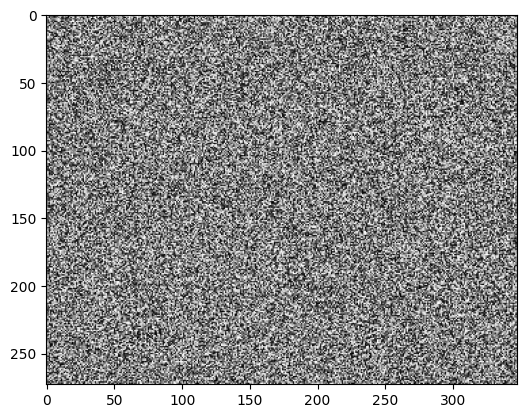

In [57]:
plt.imshow(DSI.reshape(N-2,M-2),cmap='gray')

In [63]:
occ = 0.1
N = left_arr.shape[0]-2
M = left_arr.shpae[1]-2
r = np.zeros((N-2,M-2))
for row in range(R.shape[1]):
  Z =  1-(np.dot(L.T,R[:,i]))
  x = list()
  C = np.zeros((N+1,M+1))
  K = np.zeros((N+1,M+1))
  for i in range(1,Z.shape[0]):
    C[i,0] = i*occ
  for j in range(1,Z.shape[1]):
    C[0,j] = j*occ
  for i in range(1,Z.shape[0]):
    for j in range(1,Z.shape[1]):
      C[i,j] = min(C[i-1,j]+occ,C[i,j-1]+occ,C[i-1][j-1]+Z[i,j])
      if(C[i,j] == C[i-1,j-1]+Z[i,j]):
        K[i,j] = 1
      elif(C[i,j] == C[i-1,j]+occ):
        K[i,j] = 2
      else:
        K[i,j] = 3
  p,q = Z.shape
  while(p>0 and q>0):
    if(K[p-1,q-1] == 1):
      p = p-1
      q = q-1
      r[row,p] = Z[p,q]
    elif(K[p-1,q-1] == 2):
      p = p-1
    else:
      q = q-1
  r[:,i] = x.reverse()



AttributeError: 'numpy.ndarray' object has no attribute 'shpae'

In [35]:
# plt.imshow(r)
r[:,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])